 Importing Libraries and Data

In [2]:
#Suppresssing warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
#importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
#importing dataset to csv

leads_df=pd.read_csv("Leads.csv")

In [5]:
#Let's see the head of our dataset
leads_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [6]:
#Let's check the dimesions of the dataframe
leads_df.shape

(9240, 37)

In [7]:
#Statstical aspects of the dataframe
leads_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [8]:
#Let's check out info of each column
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [9]:
#check for duplicates
sum(leads_df.duplicated(subset = 'Prospect ID')) == 0

True

In [10]:
#check for duplicates
sum(leads_df.duplicated(subset = 'Lead Number')) == 0

True

 EDA

In [11]:
#dropping Lead Number and Prospect ID since they have all unique values

leads_df.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)

In [12]:
#Replacing 'Select' values with Nan
leads_df=leads_df.replace("Select", np.nan)

In [13]:
#Checking for count of missing values in each column
leads_df.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

In [14]:
#checking percentage of null values in each column

round(100*(leads_df.isnull().sum()/len(leads_df.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [15]:
#Drop all the columns with more than 45% missing values
cols=leads_df.columns

for i in cols:
    if((100*(leads_df[i].isnull().sum()/len(leads_df.index))) >= 35):
        leads_df.drop(i, 1, inplace = True)

In [16]:
#checking percentage of null values in each column after dropping columns with more than 45% missing values

round(100*(leads_df.isnull().sum()/len(leads_df.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Advertisement                             0.00
Through Re

## Dealing with categorical variable

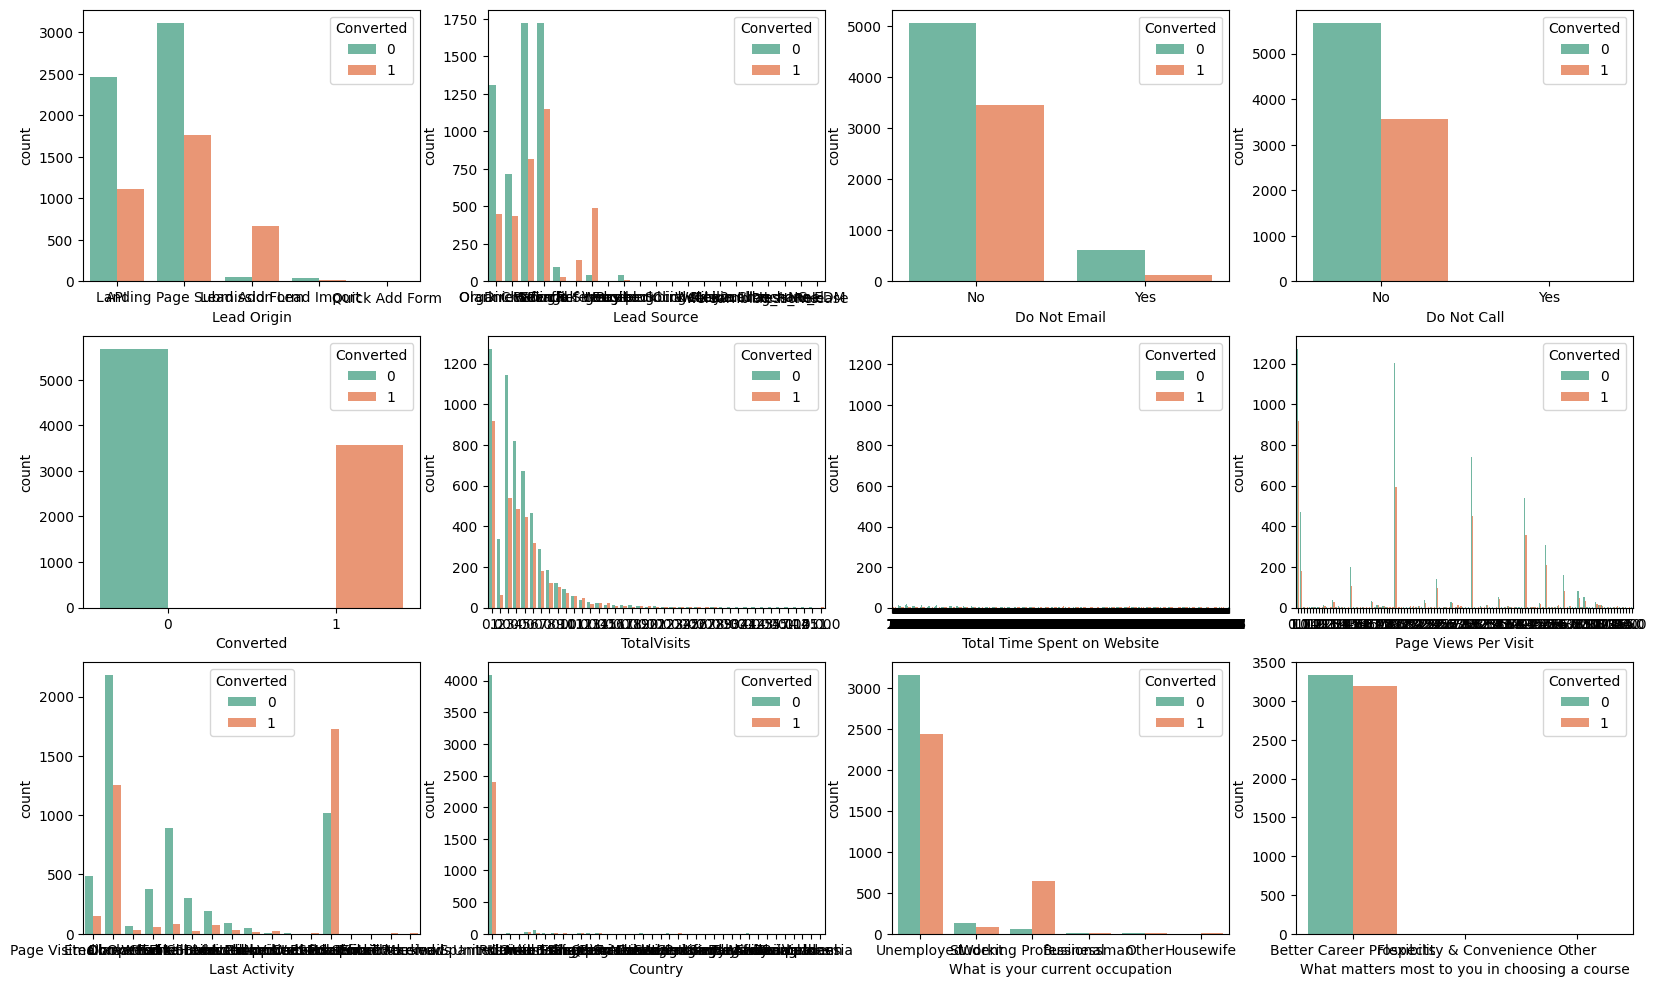

In [17]:
# Create a figure and axes
fig, axs = plt.subplots(3, 4, figsize=(20, 12))

# Plot the countplots
for i in range(3):
    for j in range(4):
        sns.countplot(
            x=leads_df.columns[i * 4 + j],
            hue="Converted",
            data=leads_df,
            ax=axs[i, j],
            palette="Set2",
        )

# Show the plot
plt.show()

In [18]:
#creating a list of columns to be dropped

cols_to_drop=(['Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
                 'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                 'Update me on Supply Chain Content',
                 'Get updates on DM Content','I agree to pay the amount through cheque','A free copy of Mastering The Interview'])

In [19]:
#checking value counts of Lead Source column

leads_df['Lead Source'].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [20]:
#replacing Nan Value with Google
leads_df['Lead Source'] = leads_df['Lead Source'].replace(np.nan,'Google')

#'Lead Source' is having same label name 'Google' but in different format i.e 'google', So converting google to Google
leads_df['Lead Source'] = leads_df['Lead Source'].replace('google','Google')

In [21]:
#combining low frequency values to Others

leads_df['Lead Source'] = leads_df['Lead Source'].replace(['bing','Click2call','Press_Release',
                                                     'youtubechannel','welearnblog_Home',
                                                     'WeLearn','blog','Pay per Click Ads',
                                                    'testone','NC_EDM','Live Chat'] ,'Others')

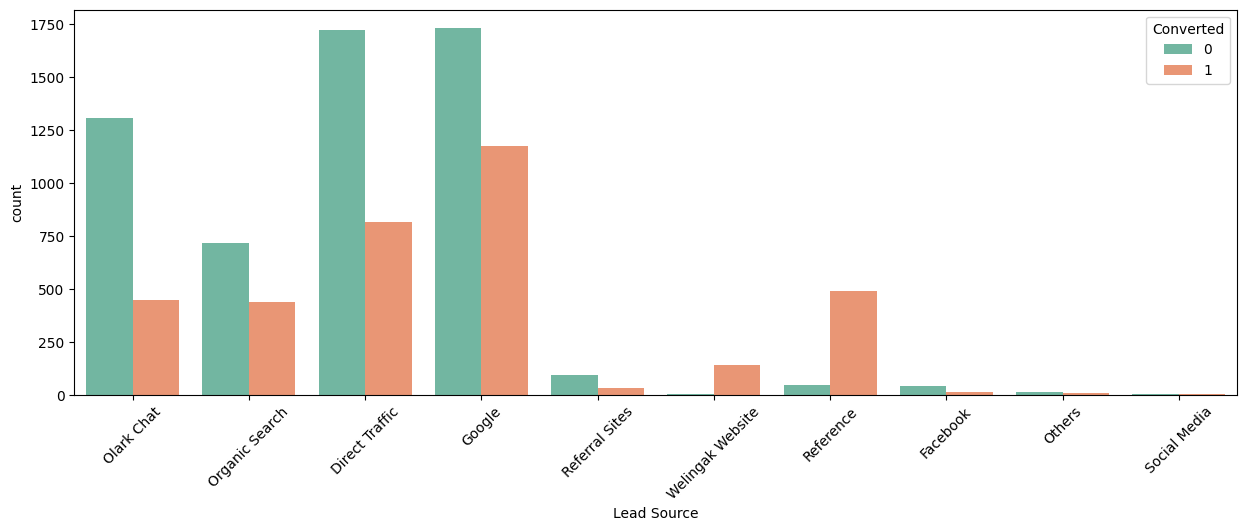

In [22]:
# Create a figure and axes
fig, ax = plt.subplots(figsize=(15, 5))

# Plot the countplot
sns.countplot(x='Lead Source', hue='Converted', data=leads_df, palette='Set2', ax=ax)

# Set the xticklabels rotation
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

# Show the plot
plt.show()

In [23]:
#checking value counts of Country column

leads_df['Country'].value_counts(dropna=False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

In [24]:
#Imputing missing values in Country column with "'not provided"
leads_df['Country'] = leads_df['Country'].replace(np.nan,'not provided')

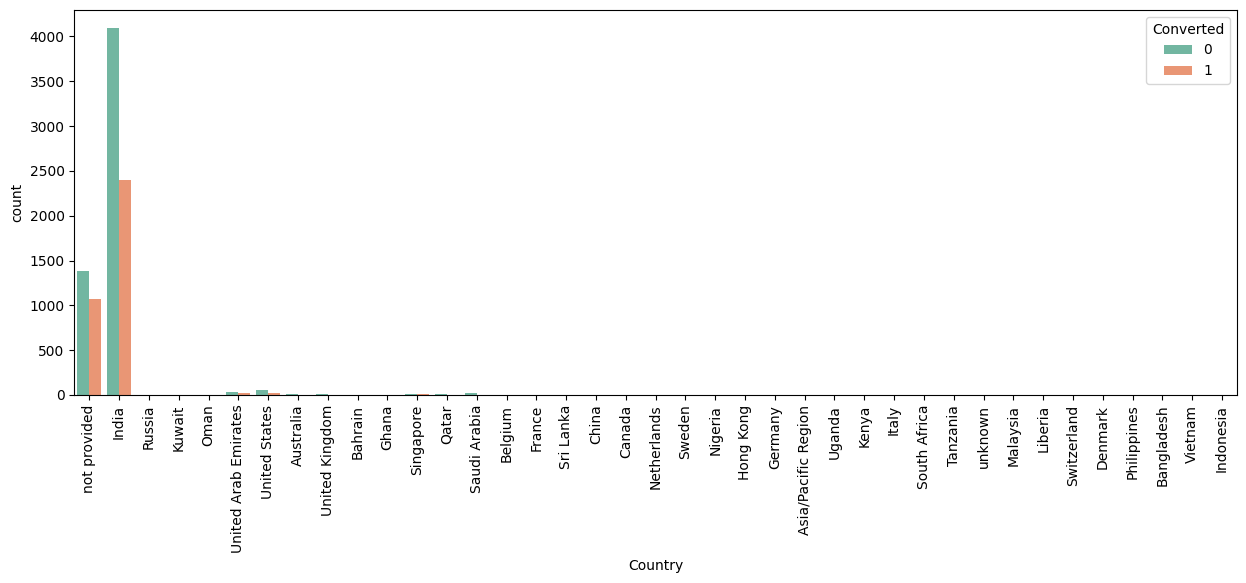

In [25]:
# Create a figure and axes
fig, ax = plt.subplots(figsize=(15, 5))

# Plot the countplot
sns.countplot(x='Country', hue='Converted', data=leads_df, palette='Set2', ax=ax)

# Set the xticklabels rotation
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# Show the plot
plt.show()

In [26]:
#creating a list of columns to be droppped

cols_to_drop.append('Country')

#checking out list of columns to be dropped
cols_to_drop

['Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'Country']

In [27]:
#checking value counts of 'What is your current occupation' column
leads_df['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [28]:
#Creating new category 'Not provided'

leads_df['What is your current occupation'] = leads_df['What is your current occupation'].replace(np.nan, 'Not provided')

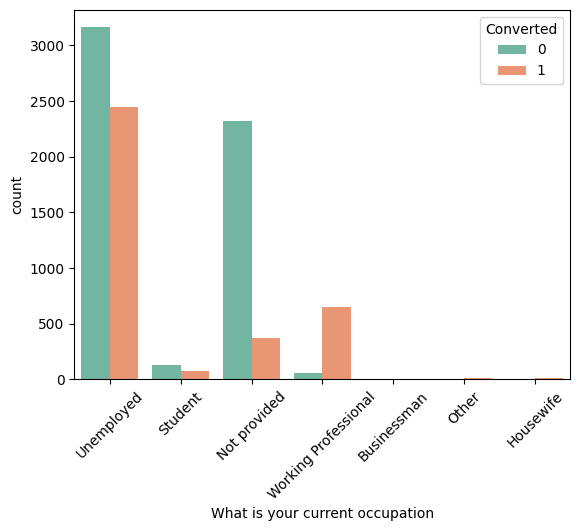

In [29]:
# Plot the countplot
s1 = sns.countplot(x='What is your current occupation', hue='Converted', data=leads_df, palette='Set2')
s1.set_xticklabels(s1.get_xticklabels(), rotation=45)
plt.show()

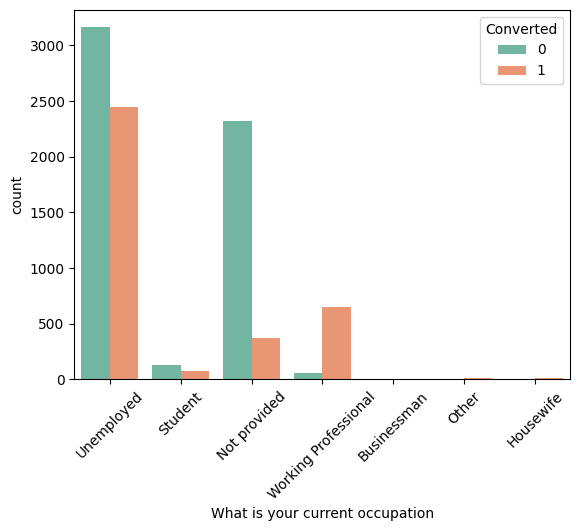

In [30]:
#visualizing count of Variable based on Converted value

s1=sns.countplot(x='What is your current occupation', hue='Converted' , data = leads_df , palette = 'Set2')
s1.set_xticklabels(s1.get_xticklabels(),rotation=45)
plt.show()

In [31]:
#checking value counts of 'What matters most to you in choosing a course'

leads_df['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [32]:
leads_df['What matters most to you in choosing a course'] = leads_df['What matters most to you in choosing a course'].replace(np.nan,'Better Career Prospects')

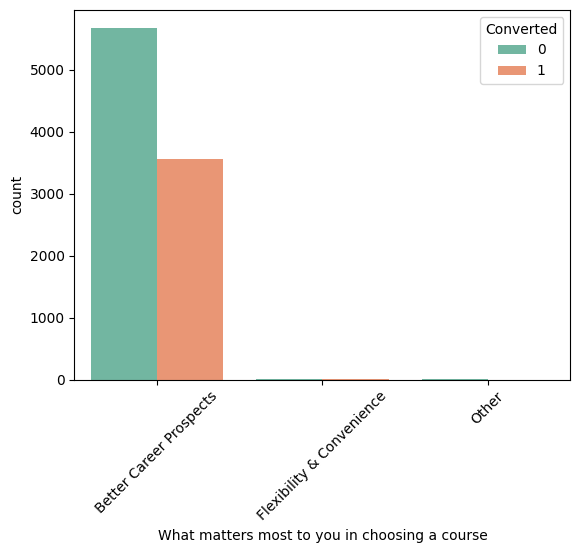

In [33]:
#visualizing count of Variable based on Converted value

s1=sns.countplot(x= 'What matters most to you in choosing a course', hue='Converted' , data = leads_df , palette = 'Set2')
s1.set_xticklabels(s1.get_xticklabels(),rotation=45)
plt.show()

In [34]:
# Append 'What matters most to you in choosing a course'to the cols_to_drop List
cols_to_drop.append('What matters most to you in choosing a course')

#checking updated list for columns to be dropped
cols_to_drop

['Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'Country',
 'What matters most to you in choosing a course']

In [35]:
#checking value counts of Last Activity
leads_df['Last Activity'].value_counts(dropna=False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [36]:
  #replacing Nan Values with mode value "Email Opened"

leads_df['Last Activity'] = leads_df['Last Activity'].replace(np.nan,'Email Opened')

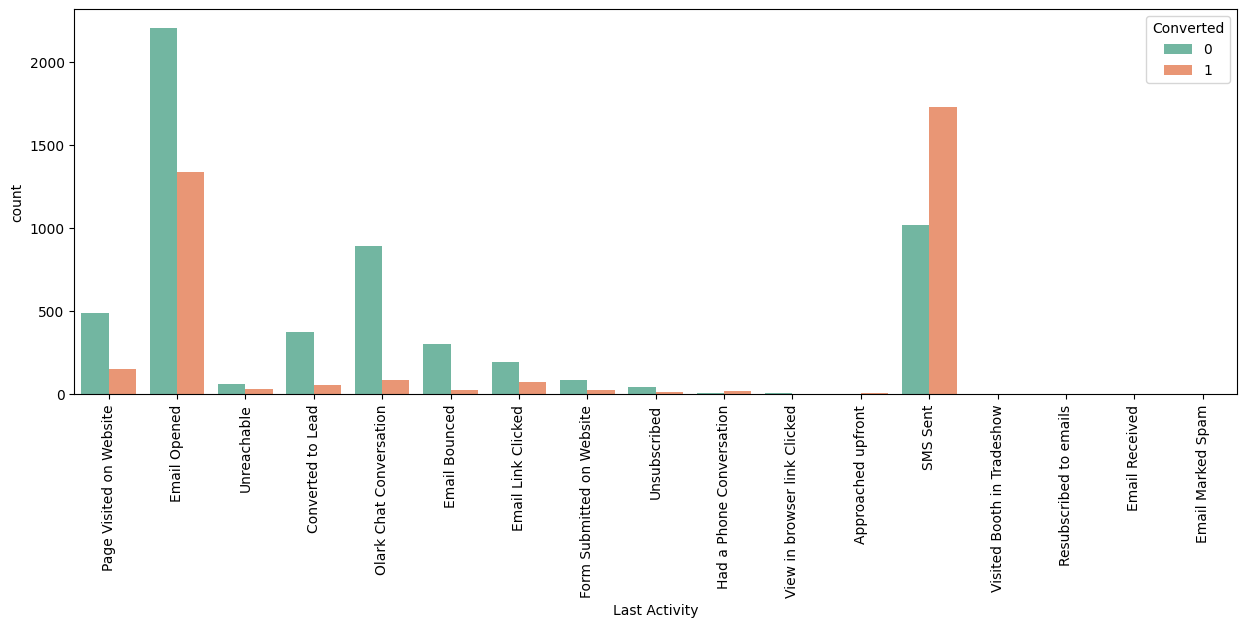

In [37]:
#visualizing count of Last Activity Variable 

plt.figure(figsize=(15,5))
s1=sns.countplot(x='Last Activity', hue='Converted' , data = leads_df , palette = 'Set2')
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [38]:
# Append 'Last Activity' to the cols_to_drop List it is a X-education's sales team generated data
cols_to_drop.append('Last Activity')

#checking updated list for columns to be dropped
cols_to_drop

['Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'Country',
 'What matters most to you in choosing a course',
 'Last Activity']

In [39]:
#Check the Null Values in All Columns after imputation:
round(100*(leads_df.isnull().sum()/len(leads_df.index)), 2)

Lead Origin                                      0.00
Lead Source                                      0.00
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    0.00
Country                                          0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement                            0.00
Through Recommendations     

In [40]:
# Remaining missing values percentage is less than 2%, we can drop those rows without affecting the data
leads_df = leads_df.dropna()

In [41]:
#Checking percentage of Null Values in All Columns:
round(100*(leads_df.isnull().sum()/len(leads_df.index)), 2)

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                            0.0
Through Recommendations                       

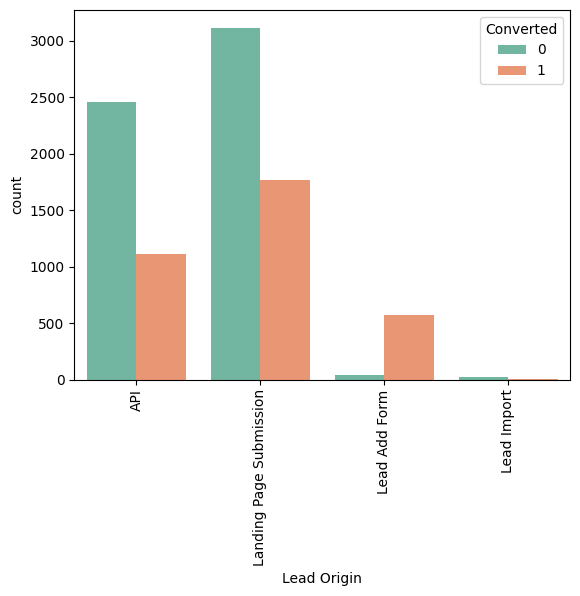

In [42]:
s1=sns.countplot(x='Lead Origin', hue='Converted' , data = leads_df , palette = 'Set2')
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

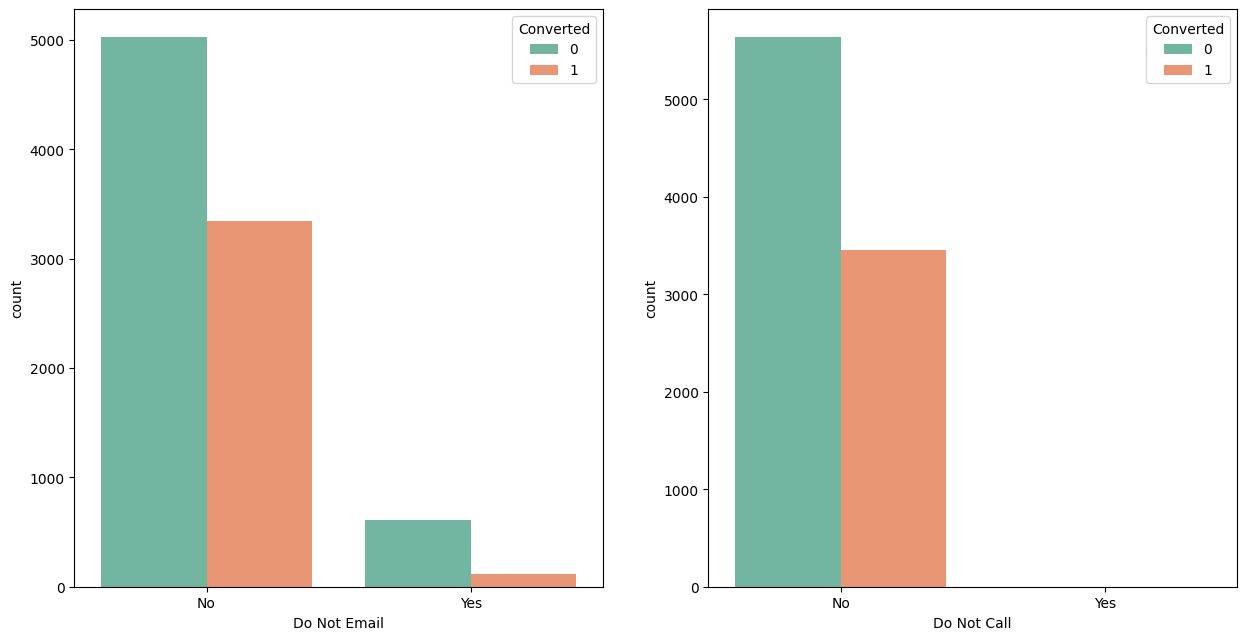

In [43]:
fig, axs = plt.subplots(1,2,figsize = (15,7.5))
sns.countplot(x = "Do Not Email", hue = "Converted", data = leads_df, ax = axs[0],palette = 'Set2')
sns.countplot(x = "Do Not Call", hue = "Converted", data = leads_df, ax = axs[1],palette = 'Set2')
plt.show()

In [44]:
# Append 'Do Not Call' to the cols_to_drop List
cols_to_drop.append('Do Not Call')

#checking updated list for columns to be dropped
cols_to_drop

['Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'Country',
 'What matters most to you in choosing a course',
 'Last Activity',
 'Do Not Call']

In [45]:
#checking value counts of last Notable Activity
leads_df['Last Notable Activity'].value_counts()

Modified                        3270
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

In [46]:
#clubbing lower frequency values

leads_df['Last Notable Activity'] = leads_df['Last Notable Activity'].replace(['Had a Phone Conversation',
                                                                       'Email Marked Spam',
                                                                         'Unreachable',
                                                                         'Unsubscribed',
                                                                         'Email Bounced',                                                                    
                                                                       'Resubscribed to emails',
                                                                       'View in browser link Clicked',
                                                                       'Approached upfront', 
                                                                       'Form Submitted on Website', 
                                                                       'Email Received'],'Others')

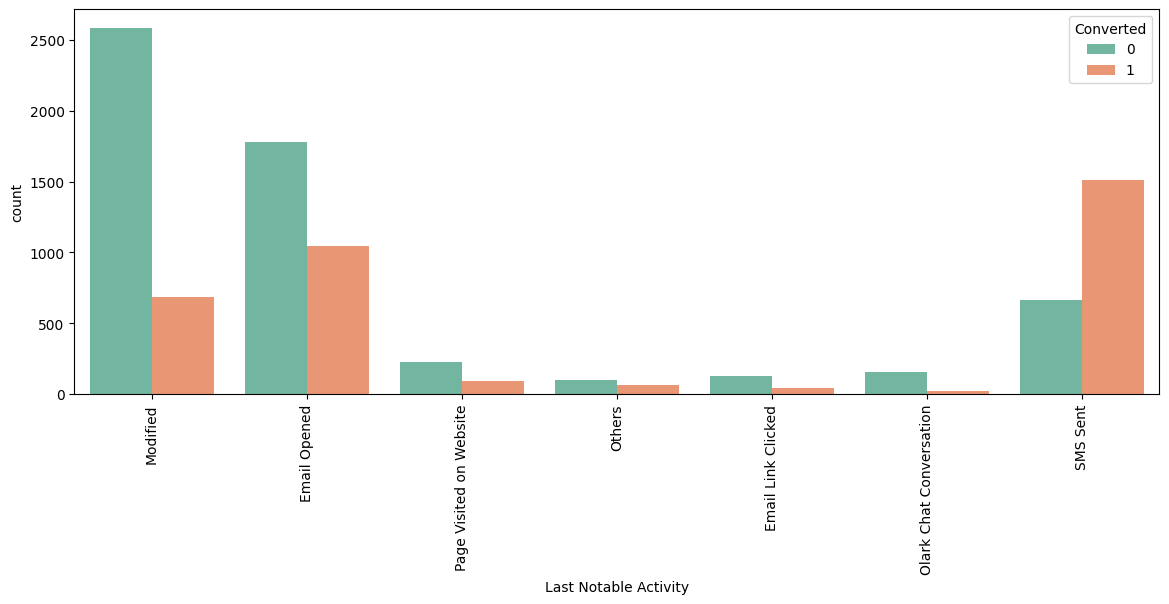

In [47]:
#visualizing count of Variable based on Converted value

plt.figure(figsize = (14,5))
ax1=sns.countplot(x = "Last Notable Activity", hue = "Converted", data = leads_df , palette = 'Set2')
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
plt.show()

In [48]:
# Append 'Last Notable Activity'to the cols_to_drop List as this is a sales team generated data
cols_to_drop.append('Last Notable Activity')

In [49]:
# checking final list of columns to be dropped
cols_to_drop

['Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'Country',
 'What matters most to you in choosing a course',
 'Last Activity',
 'Do Not Call',
 'Last Notable Activity']

In [50]:
#dropping columns
leads = leads_df.drop(cols_to_drop,1)

#checking info of dataset for remaining columns
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Lead Origin                      9103 non-null   object 
 1   Lead Source                      9103 non-null   object 
 2   Do Not Email                     9103 non-null   object 
 3   Converted                        9103 non-null   int64  
 4   TotalVisits                      9103 non-null   float64
 5   Total Time Spent on Website      9103 non-null   int64  
 6   Page Views Per Visit             9103 non-null   float64
 7   What is your current occupation  9103 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 640.1+ KB


In [51]:
#checking dataset
leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,What is your current occupation
0,API,Olark Chat,No,0,0.0,0,0.0,Unemployed
1,API,Organic Search,No,0,5.0,674,2.5,Unemployed
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Student
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unemployed
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Unemployed


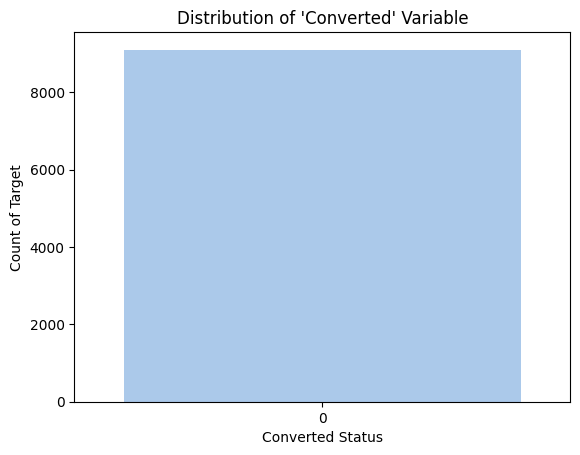

In [52]:
# Converted is the target variable, Indicates whether a lead has been successfully converted (1) or not (0).
# Visualizing Distribution of 'Converted' Variable
sns.countplot(leads.Converted, palette="pastel")
plt.xlabel("Converted Status")
plt.ylabel("Count of Target")
plt.title("Distribution of 'Converted' Variable")
plt.show()

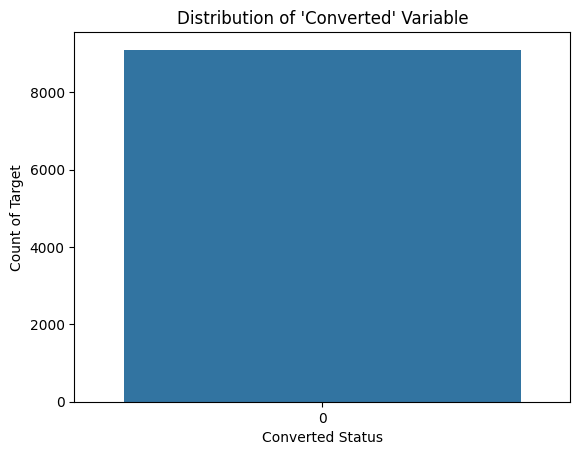

In [53]:
#Converted is the target variable, Indicates whether a lead has been successfully converted (1) or not (0).
#Visualizing Distribution of 'Converted' Variable
sns.countplot(leads.Converted)
plt.xlabel("Converted Status")
plt.ylabel("Count of Target")
plt.title("Distribution of 'Converted' Variable")
plt.show()

In [54]:
# Finding out conversion rate
Converted = (sum(leads['Converted'])/len(leads['Converted'].index))*100
Converted

38.02043282434362

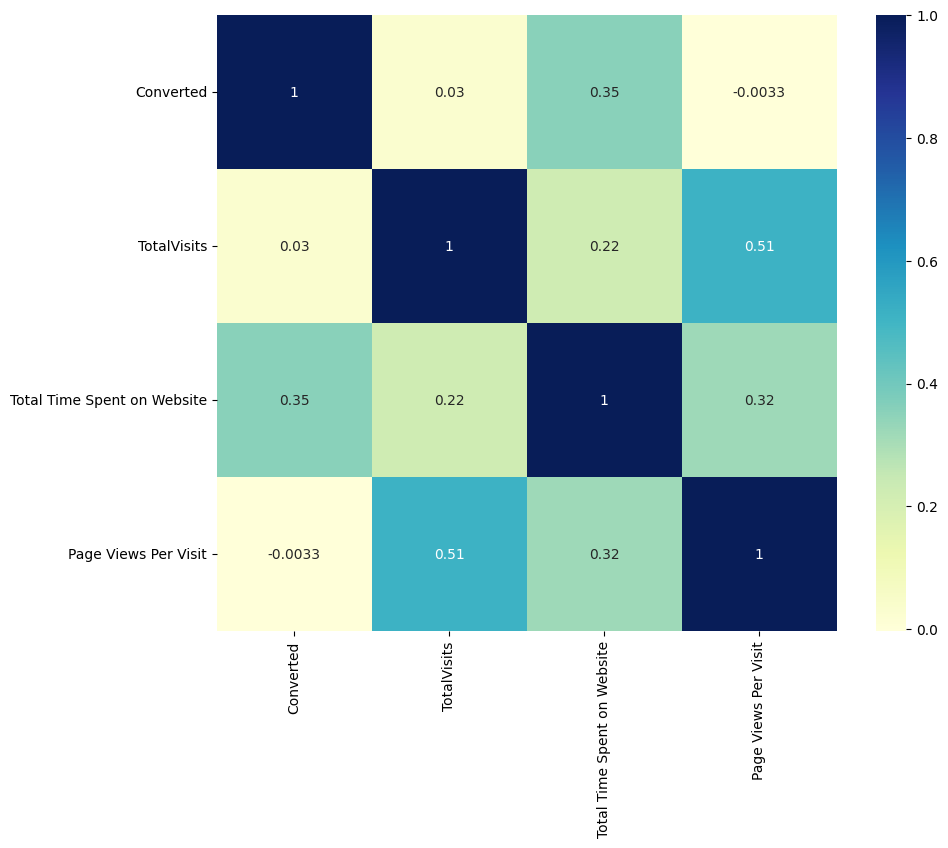

In [55]:
#Checking correlations of numeric values using heatmap

# Size of the figure
plt.figure(figsize=(10,8))

# heatmap
sns.heatmap(leads.corr(), cmap="YlGnBu", annot=True)
plt.show()

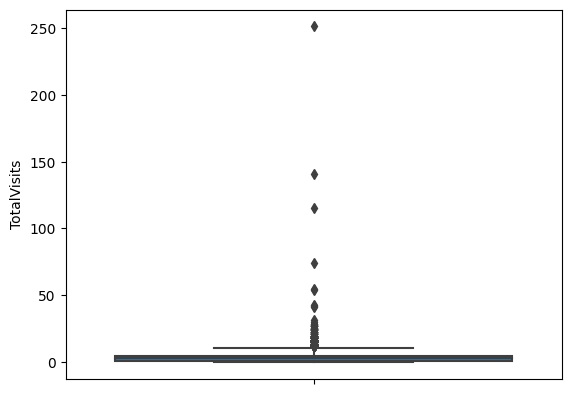

In [56]:
#visualizing spread of variable Total Visits

sns.boxplot(y=leads['TotalVisits'])
plt.show()

In [57]:
#checking percentile values for "Total Visits"

leads['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

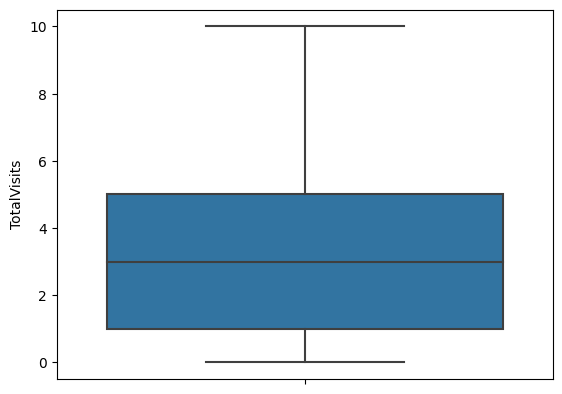

In [58]:
#Outlier Treatment: capping the outliers to 95% value for analysis

percentiles = leads['TotalVisits'].quantile([0.05,0.95]).values
leads['TotalVisits'][leads['TotalVisits'] <= percentiles[0]] = percentiles[0]
leads['TotalVisits'][leads['TotalVisits'] >= percentiles[1]] = percentiles[1]

#visualizing variable after outlier treatment
sns.boxplot(y=leads['TotalVisits'])
plt.show()

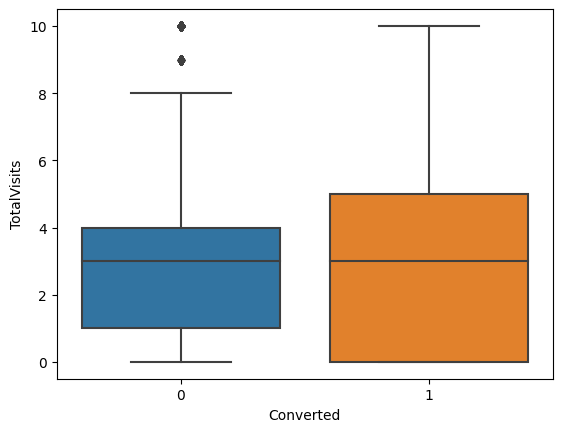

In [59]:
# Visualizing TotalVisits w.r.t Target Variable 'Converted'
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = leads)
plt.show()

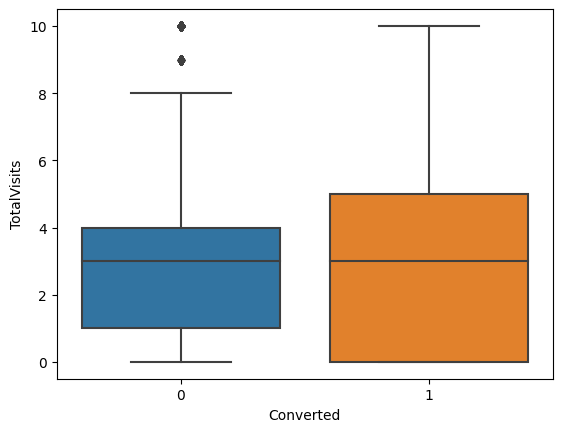

In [60]:
# Visualizing TotalVisits w.r.t Target Variable 'Converted'
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = leads)
plt.show()

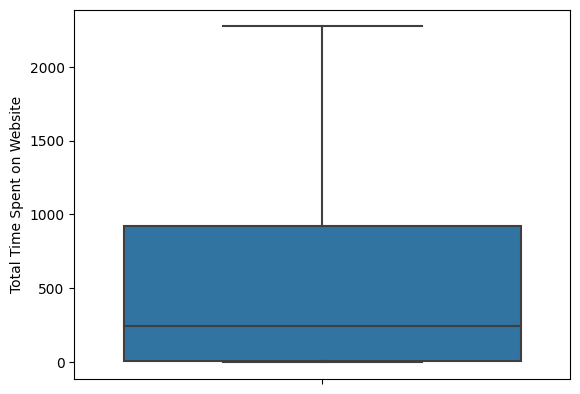

In [61]:
#visualizing spread of variable 'Total Time Spent on Website'
sns.boxplot(y = leads['Total Time Spent on Website'])
plt.show()

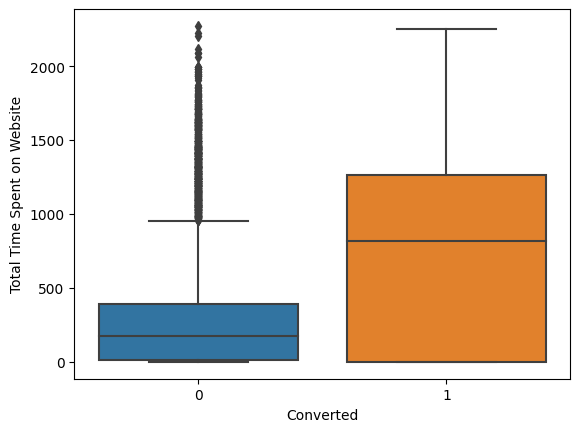

In [62]:
# Visualizing 'Total Time Spent on Website' w.r.t Target Variable 'converted'
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = leads)
plt.show()

In [63]:
leads['Page Views Per Visit'].describe()

count    9103.000000
mean        2.362820
std         2.161418
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

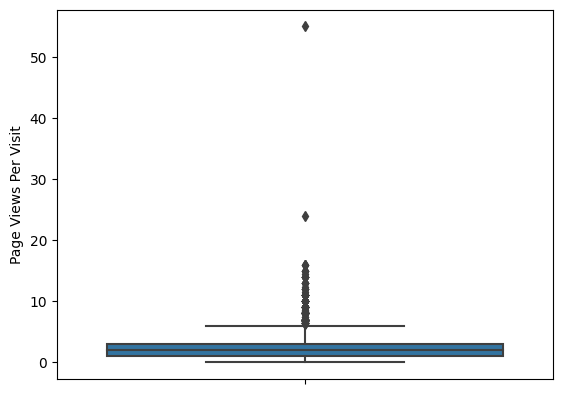

In [64]:
#visualizing spread of variable 'Page Views Per Visit'
sns.boxplot(y =leads['Page Views Per Visit'])
plt.show()

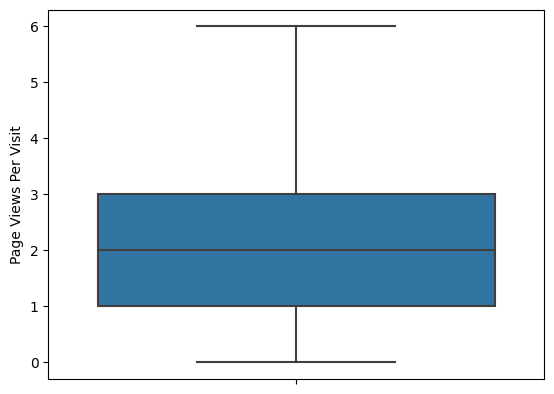

In [65]:
#Outlier Treatment: capping the outliers to 95% value for analysis
percentiles = leads['Page Views Per Visit'].quantile([0.05,0.95]).values
leads['Page Views Per Visit'][leads['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
leads['Page Views Per Visit'][leads['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]

#visualizing variable after outlier treatment
sns.boxplot(y=leads['Page Views Per Visit'])
plt.show()

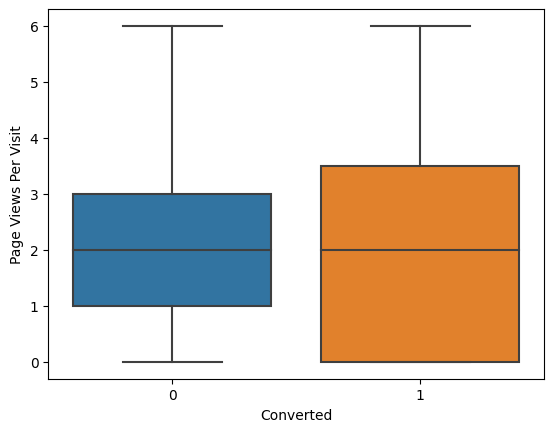

In [66]:
#visualizing 'Page Views Per Visit' w.r.t Target variable 'Converted'
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = leads)
plt.show()

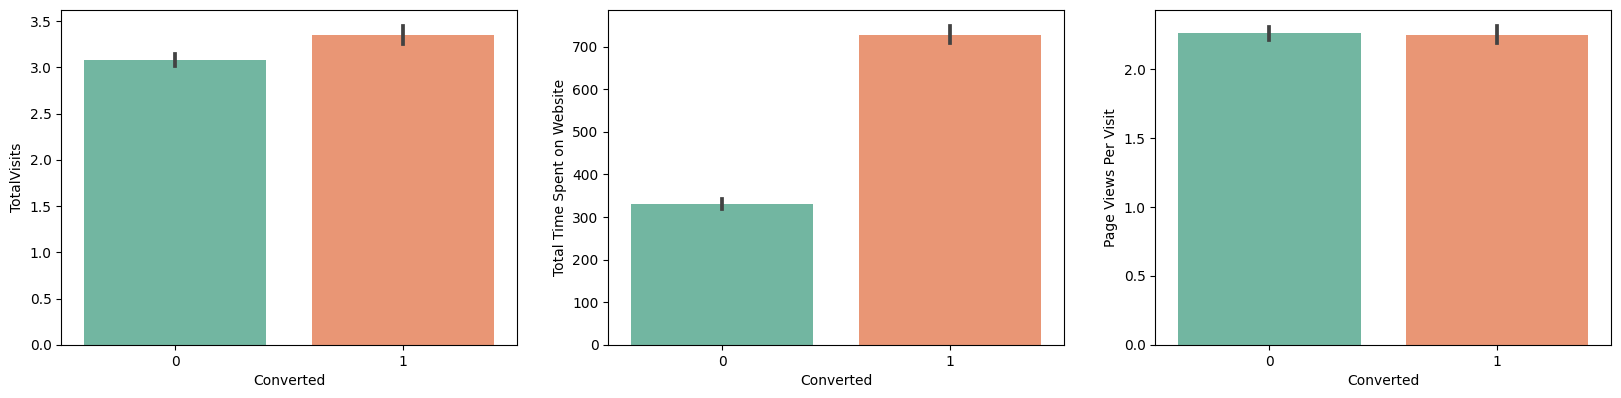

In [67]:
# Now check the conversions for all numeric values

plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'TotalVisits', x='Converted', palette='Set2', data = leads)
plt.subplot(4,3,2)
sns.barplot(y = 'Total Time Spent on Website', x='Converted', palette='Set2', data = leads)
plt.subplot(4,3,3)
sns.barplot(y = 'Page Views Per Visit', x='Converted', palette='Set2', data = leads)
plt.show()

## Data Prparation 

In [68]:
# List of variables to map

varlist =  ['Do Not Email']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
leads[varlist] = leads[varlist].apply(binary_map)

In [69]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,What is your current occupation
0,API,Olark Chat,0,0,0.0,0,0.0,Unemployed
1,API,Organic Search,0,0,5.0,674,2.5,Unemployed
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Student
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unemployed
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Unemployed


In [70]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Lead Origin                      9103 non-null   object 
 1   Lead Source                      9103 non-null   object 
 2   Do Not Email                     9103 non-null   int64  
 3   Converted                        9103 non-null   int64  
 4   TotalVisits                      9103 non-null   float64
 5   Total Time Spent on Website      9103 non-null   int64  
 6   Page Views Per Visit             9103 non-null   float64
 7   What is your current occupation  9103 non-null   object 
dtypes: float64(2), int64(3), object(3)
memory usage: 898.1+ KB


In [71]:
#getting a list of categorical columns foy creating dummy

cat_cols= leads.select_dtypes(include=['object']).columns
cat_cols

Index(['Lead Origin', 'Lead Source', 'What is your current occupation'], dtype='object')

In [72]:
#getting dummies and dropping the first column and adding the results to the master dataframe
dummy = pd.get_dummies(leads[['Lead Origin']], drop_first=True)
leads = pd.concat([leads,dummy],1)



dummy = pd.get_dummies(leads['Lead Source'], prefix  = 'Lead Source')
dummy = dummy.drop(['Lead Source_Others'], 1)
leads = pd.concat([leads, dummy], axis = 1)


dummy = pd.get_dummies(leads['What is your current occupation'], prefix  = 'What is your current occupation')
dummy = dummy.drop(['What is your current occupation_Not provided'], 1)
leads = pd.concat([leads, dummy], axis = 1)

In [73]:
#dropping the original columns after dummy variable creation

leads.drop(cat_cols,1,inplace = True)

In [74]:
#checking dataset after dummy variable creation
leads.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,...,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,1,2.0,1532,2.0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1.0,305,1.0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,0,1,2.0,1428,1.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [75]:
#importing library for splitting dataset
from sklearn.model_selection import train_test_split

In [76]:
# Putting feature variable to X
X=leads.drop('Converted', axis=1)

#checking head of X
X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,2.0,1532,2.0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,1.0,305,1.0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,2.0,1428,1.0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [77]:
# Putting response variable to y
y = leads['Converted']

#checking head of y
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [78]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [79]:
#importing library for feature scaling
from sklearn.preprocessing import StandardScaler

In [80]:
#scaling of features
scaler = StandardScaler()

num_cols=X_train.select_dtypes(include=['float64', 'int64']).columns

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

#checking X-train dataset after scaling
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
7962,-0.294015,-0.068258,1.476324,-0.423364,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
5520,-0.294015,1.362470,-0.771066,2.083179,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1962,-0.294015,0.647106,-0.571257,0.133646,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1566,-0.294015,2.435517,1.393834,0.690655,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
9170,-0.294015,-1.141305,-0.881052,-1.258878,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [81]:
## Checking the conversion rate from 'converted' column as it denotes the target variable

(sum(y)/len(y.index))*100

38.02043282434362

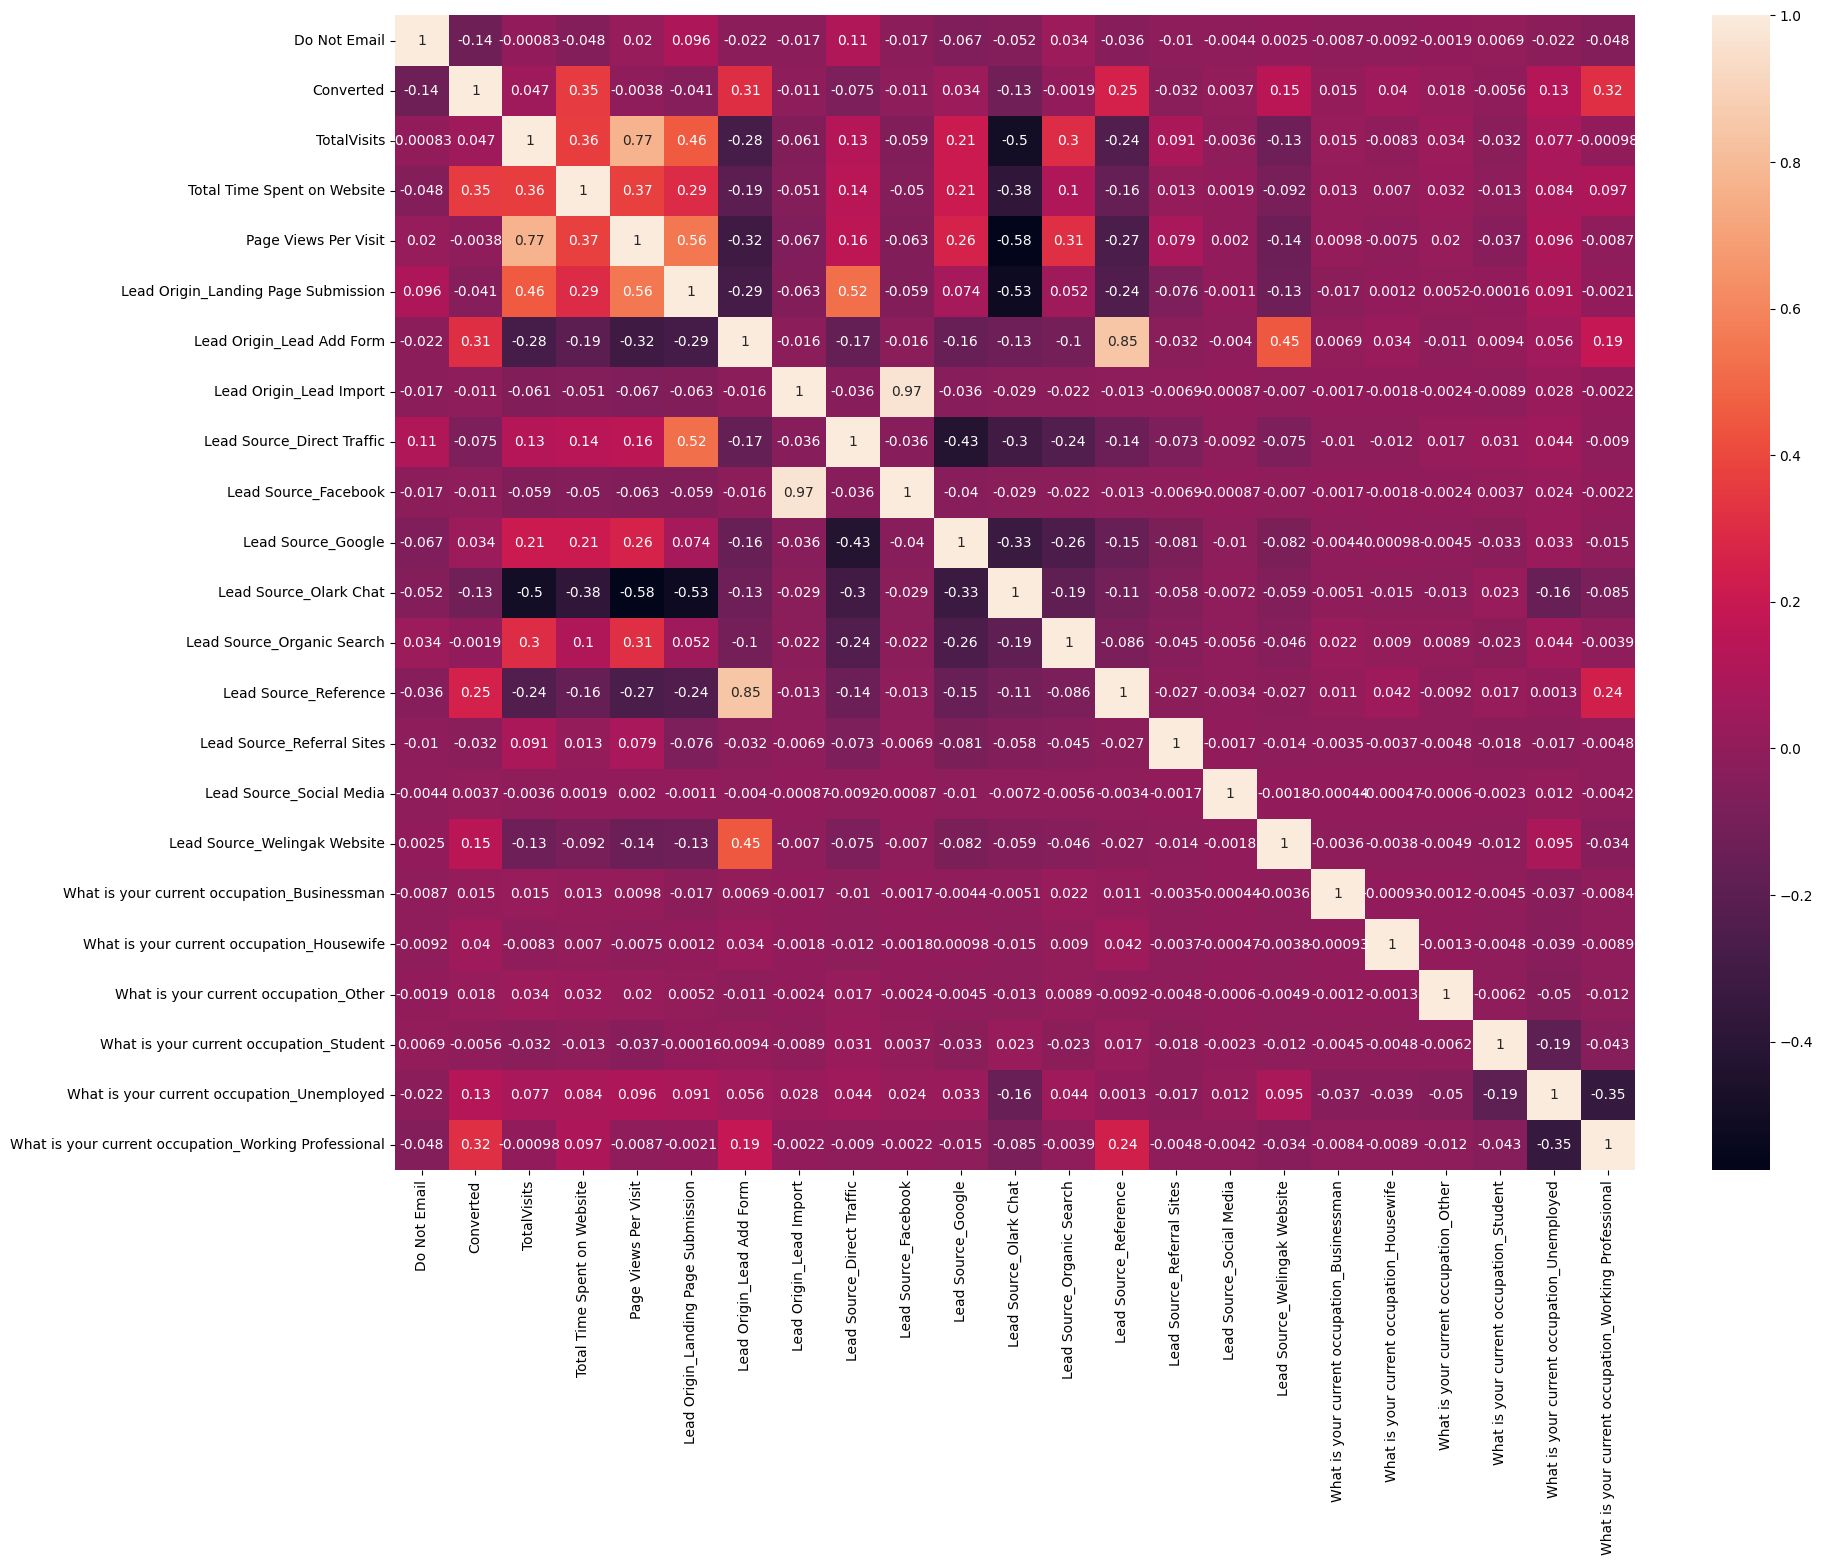

In [82]:
# Let's see the correlation matrix
plt.figure(figsize = (20,15))        # Size of the figure
sns.heatmap(leads.corr(),annot = True)
plt.show()

In [83]:
X_test = X_test.drop(['Lead Source_Olark Chat','Lead Origin_Landing Page Submission'],1)

In [84]:
X_train = X_train.drop(['Lead Source_Olark Chat','Lead Origin_Landing Page Submission'],1)

In [85]:
# importing necessary library
import statsmodels.api as sm

In [86]:
pip install -U scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [87]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(estimator=logreg, n_features_to_select=15)
             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [88]:
rfe.support_

array([ True, False,  True, False,  True, False,  True, False,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True])

In [89]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 2),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 3),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 4),
 ('Lead Source_Direct Traffic', True, 1),
 ('Lead Source_Facebook', False, 5),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Organic Search', True, 1),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', True, 1),
 ('Lead Source_Social Media', False, 6),
 ('Lead Source_Welingak Website', True, 1),
 ('What is your current occupation_Businessman', True, 1),
 ('What is your current occupation_Housewife', True, 1),
 ('What is your current occupation_Other', True, 1),
 ('What is your current occupation_Student', True, 1),
 ('What is your current occupation_Unemployed', True, 1),
 ('What is your current occupation_Working Professional', True, 1)]

In [90]:
#list of RFE supported columns
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Direct Traffic',
       'Lead Source_Google', 'Lead Source_Organic Search',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Welingak Website',
       'What is your current occupation_Businessman',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional'],
      dtype='object')

In [91]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit', 'Lead Origin_Lead Import',
       'Lead Source_Facebook', 'Lead Source_Social Media'],
      dtype='object')

In [92]:
#BUILDING MODEL #1

X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6356
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2862.8
Date:                Tue, 23 May 2023   Deviance:                       5725.6
Time:                        13:22:26   Pearson chi2:                 6.38e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3490
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.2420      0.096    -12.979      0.000      -1.430      -1.054
Do Not Email                                            -0.3583      0.043     -8.295      0.000      -0.443      -0.274
Total Time Spent on Website                              1.0998      0.038     28.576      0.000       1.024       1.175
Lead Origin_Lead Add Form                                4.1642      0.774      5.379      0.000       2.647       5.682
Lead Source_Direct Traffic                              -1.0592      0.108     -9.834      0.000      -1.270      -0.848
Lead Source_Google                                      -0.7850      0.103     -7.616      0.000      -0.987      -0.583
Lead Source_Organic Search                              -0.8803      0.124     -7.094      0.000      -1.123      -0.637
Lead Source_Reference                                   -1.3303      0.806     -1.650      0.099      -2.911       0.250
Lead Source_Referral Sites                              -1.3703      0.336     -4.075      0.000      -2.029      -0.711
Lead Source_Welingak Website                             0.7219      1.055      0.684      0.494      -1.347       2.790
What is your current occupation_Businessman              1.5018      0.999      1.503      0.133      -0.456       3.460
What is your current occupation_Housewife               23.8830    1.6e+04      0.001      0.999   -3.14e+04    3.14e+04
What is your current occupation_Other                    1.3577      0.641      2.118      0.034       0.101       2.614
What is your current occupation_Student                  1.1827      0.225      5.268      0.000       0.743       1.623
What is your current occupation_Unemployed               1.3095      0.083     15.683      0.000       1.146       1.473
What is your current occupation_Working Professional     3.8054      0.189     20.105      0.000       3.434       4.176
========================================================================================================================
"""

In [93]:
#dropping column with high p-value

col = col.drop('What is your current occupation_Housewife',1)

In [94]:
#BUILDING MODEL #2

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6357
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2872.3
Date:                Tue, 23 May 2023   Deviance:                       5744.6
Time:                        13:22:26   Pearson chi2:                 6.40e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3470
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.2247      0.095    -12.862      0.000      -1.411      -1.038
Do Not Email                                            -0.3597      0.043     -8.331      0.000      -0.444      -0.275
Total Time Spent on Website                              1.0996      0.038     28.619      0.000       1.024       1.175
Lead Origin_Lead Add Form                                4.1662      0.774      5.381      0.000       2.649       5.684
Lead Source_Direct Traffic                              -1.0517      0.108     -9.778      0.000      -1.262      -0.841
Lead Source_Google                                      -0.7756      0.103     -7.540      0.000      -0.977      -0.574
Lead Source_Organic Search                              -0.8645      0.124     -6.984      0.000      -1.107      -0.622
Lead Source_Reference                                   -1.3089      0.806     -1.623      0.105      -2.889       0.272
Lead Source_Referral Sites                              -1.3681      0.336     -4.072      0.000      -2.027      -0.710
Lead Source_Welingak Website                             0.7294      1.055      0.691      0.490      -1.339       2.798
What is your current occupation_Businessman              1.4744      1.000      1.475      0.140      -0.485       3.434
What is your current occupation_Other                    1.3321      0.641      2.079      0.038       0.076       2.588
What is your current occupation_Student                  1.1579      0.224      5.160      0.000       0.718       1.598
What is your current occupation_Unemployed               1.2836      0.083     15.498      0.000       1.121       1.446
What is your current occupation_Working Professional     3.7795      0.189     19.999      0.000       3.409       4.150
========================================================================================================================
"""

In [95]:
#dropping column with high p-value

col = col.drop('Lead Source_Welingak Website',1)

In [96]:
#BUILDING MODEL #3

X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6358
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2872.5
Date:                Tue, 23 May 2023   Deviance:                       5745.1
Time:                        13:22:26   Pearson chi2:                 6.42e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3470
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.2215      0.095    -12.847      0.000      -1.408      -1.035
Do Not Email                                            -0.3606      0.043     -8.350      0.000      -0.445      -0.276
Total Time Spent on Website                              1.1006      0.038     28.654      0.000       1.025       1.176
Lead Origin_Lead Add Form                                4.6079      0.523      8.807      0.000       3.582       5.633
Lead Source_Direct Traffic                              -1.0559      0.107     -9.832      0.000      -1.266      -0.845
Lead Source_Google                                      -0.7818      0.103     -7.623      0.000      -0.983      -0.581
Lead Source_Organic Search                              -0.8687      0.124     -7.026      0.000      -1.111      -0.626
Lead Source_Reference                                   -1.7536      0.564     -3.109      0.002      -2.859      -0.648
Lead Source_Referral Sites                              -1.3724      0.336     -4.085      0.000      -2.031      -0.714
What is your current occupation_Businessman              1.4745      1.000      1.475      0.140      -0.485       3.434
What is your current occupation_Other                    1.3324      0.641      2.080      0.038       0.077       2.588
What is your current occupation_Student                  1.1571      0.225      5.154      0.000       0.717       1.597
What is your current occupation_Unemployed               1.2843      0.083     15.505      0.000       1.122       1.447
What is your current occupation_Working Professional     3.7806      0.189     20.002      0.000       3.410       4.151
========================================================================================================================
"""

In [97]:
#BUILDING MODEL #3

X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6358
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2872.5
Date:                Tue, 23 May 2023   Deviance:                       5745.1
Time:                        13:22:27   Pearson chi2:                 6.42e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3470
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.2215      0.095    -12.847      0.000      -1.408      -1.035
Do Not Email                                            -0.3606      0.043     -8.350      0.000      -0.445      -0.276
Total Time Spent on Website                              1.1006      0.038     28.654      0.000       1.025       1.176
Lead Origin_Lead Add Form                                4.6079      0.523      8.807      0.000       3.582       5.633
Lead Source_Direct Traffic                              -1.0559      0.107     -9.832      0.000      -1.266      -0.845
Lead Source_Google                                      -0.7818      0.103     -7.623      0.000      -0.983      -0.581
Lead Source_Organic Search                              -0.8687      0.124     -7.026      0.000      -1.111      -0.626
Lead Source_Reference                                   -1.7536      0.564     -3.109      0.002      -2.859      -0.648
Lead Source_Referral Sites                              -1.3724      0.336     -4.085      0.000      -2.031      -0.714
What is your current occupation_Businessman              1.4745      1.000      1.475      0.140      -0.485       3.434
What is your current occupation_Other                    1.3324      0.641      2.080      0.038       0.077       2.588
What is your current occupation_Student                  1.1571      0.225      5.154      0.000       0.717       1.597
What is your current occupation_Unemployed               1.2843      0.083     15.505      0.000       1.122       1.447
What is your current occupation_Working Professional     3.7806      0.189     20.002      0.000       3.410       4.151
========================================================================================================================
"""

In [98]:
#BUILDING MODEL #4

X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6358
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2872.5
Date:                Tue, 23 May 2023   Deviance:                       5745.1
Time:                        13:22:27   Pearson chi2:                 6.42e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3470
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.2215      0.095    -12.847      0.000      -1.408      -1.035
Do Not Email                                            -0.3606      0.043     -8.350      0.000      -0.445      -0.276
Total Time Spent on Website                              1.1006      0.038     28.654      0.000       1.025       1.176
Lead Origin_Lead Add Form                                4.6079      0.523      8.807      0.000       3.582       5.633
Lead Source_Direct Traffic                              -1.0559      0.107     -9.832      0.000      -1.266      -0.845
Lead Source_Google                                      -0.7818      0.103     -7.623      0.000      -0.983      -0.581
Lead Source_Organic Search                              -0.8687      0.124     -7.026      0.000      -1.111      -0.626
Lead Source_Reference                                   -1.7536      0.564     -3.109      0.002      -2.859      -0.648
Lead Source_Referral Sites                              -1.3724      0.336     -4.085      0.000      -2.031      -0.714
What is your current occupation_Businessman              1.4745      1.000      1.475      0.140      -0.485       3.434
What is your current occupation_Other                    1.3324      0.641      2.080      0.038       0.077       2.588
What is your current occupation_Student                  1.1571      0.225      5.154      0.000       0.717       1.597
What is your current occupation_Unemployed               1.2843      0.083     15.505      0.000       1.122       1.447
What is your current occupation_Working Professional     3.7806      0.189     20.002      0.000       3.410       4.151
========================================================================================================================
"""

In [99]:
#dropping column with high p-value

col = col.drop('What is your current occupation_Other',1)

In [100]:
#BUILDING MODEL #5

X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6359
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2874.6
Date:                Tue, 23 May 2023   Deviance:                       5749.3
Time:                        13:22:27   Pearson chi2:                 6.42e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3466
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.2078      0.095    -12.760      0.000      -1.393      -1.022
Do Not Email                                            -0.3596      0.043     -8.338      0.000      -0.444      -0.275
Total Time Spent on Website                              1.1025      0.038     28.703      0.000       1.027       1.178
Lead Origin_Lead Add Form                                4.6104      0.523      8.813      0.000       3.585       5.636
Lead Source_Direct Traffic                              -1.0508      0.107     -9.792      0.000      -1.261      -0.840
Lead Source_Google                                      -0.7806      0.102     -7.616      0.000      -0.982      -0.580
Lead Source_Organic Search                              -0.8670      0.124     -7.010      0.000      -1.109      -0.625
Lead Source_Reference                                   -1.7523      0.564     -3.107      0.002      -2.858      -0.647
Lead Source_Referral Sites                              -1.3744      0.336     -4.091      0.000      -2.033      -0.716
What is your current occupation_Businessman              1.4593      1.000      1.459      0.145      -0.501       3.420
What is your current occupation_Student                  1.1413      0.224      5.087      0.000       0.702       1.581
What is your current occupation_Unemployed               1.2683      0.082     15.420      0.000       1.107       1.430
What is your current occupation_Working Professional     3.7647      0.189     19.945      0.000       3.395       4.135
========================================================================================================================
"""

In [101]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Lead Add Form,3.81
6,Lead Source_Reference,3.64
10,What is your current occupation_Unemployed,2.59
4,Lead Source_Google,1.71
3,Lead Source_Direct Traffic,1.67
5,Lead Source_Organic Search,1.31
11,What is your current occupation_Working Profes...,1.29
1,Total Time Spent on Website,1.12
9,What is your current occupation_Student,1.05
0,Do Not Email,1.03


In [102]:
# Getting the Predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

7962    0.733650
5520    0.149987
1962    0.223699
1566    0.968282
9170    0.308922
5097    0.111702
8954    0.254675
309     0.258407
5519    0.111702
1050    0.649100
dtype: float64

In [103]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.7336505 , 0.14998749, 0.22369881, 0.96828165, 0.30892219,
       0.11170202, 0.25467535, 0.25840686, 0.11170202, 0.64909995])

In [104]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.733650,7962
1,0,0.149987,5520
2,0,0.223699,1962
3,1,0.968282,1566
4,0,0.308922,9170


In [105]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,0,0.733650,7962,1
1,0,0.149987,5520,0
2,0,0.223699,1962,0
3,1,0.968282,1566,1
4,0,0.308922,9170,0


In [106]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3551  402]
 [ 850 1569]]


In [107]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.8035153797865662


In [108]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [109]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6486151302190988

In [110]:
# Let us calculate specificity
TN / float(TN+FP)

0.8983050847457628

In [111]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.1016949152542373


In [112]:
# positive predictive value 
print (TP / float(TP+FP))

0.7960426179604262


In [113]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8068620768007271


In [114]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [115]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

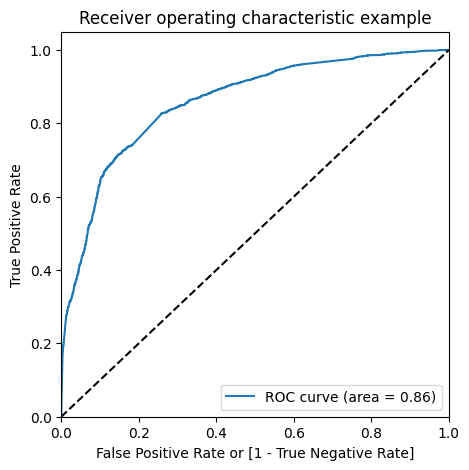

In [116]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

In [117]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.733650,7962,1,1,1,1,1,1,1,1,1,0,0
1,0,0.149987,5520,0,1,1,0,0,0,0,0,0,0,0
2,0,0.223699,1962,0,1,1,1,0,0,0,0,0,0,0
3,1,0.968282,1566,1,1,1,1,1,1,1,1,1,1,1
4,0,0.308922,9170,0,1,1,1,1,0,0,0,0,0,0


In [118]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.379630  1.000000  0.000000
0.1   0.1  0.515851  0.982224  0.230458
0.2   0.2  0.690207  0.906986  0.557551
0.3   0.3  0.770559  0.828855  0.734885
0.4   0.4  0.801789  0.700289  0.863901
0.5   0.5  0.803515  0.648615  0.898305
0.6   0.6  0.780917  0.561389  0.915254
0.7   0.7  0.759416  0.467135  0.938275
0.8   0.8  0.734306  0.354692  0.966608
0.9   0.9  0.690364  0.193055  0.994688


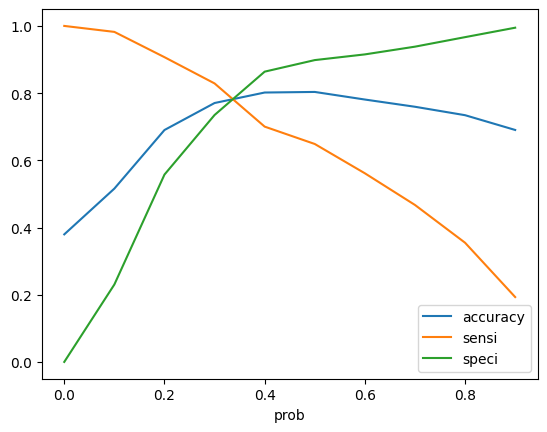

In [119]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [120]:
y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,0,0.733650,7962,1,1,1,1,1,1,1,1,1,0,0,1
1,0,0.149987,5520,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.223699,1962,0,1,1,1,0,0,0,0,0,0,0,0
3,1,0.968282,1566,1,1,1,1,1,1,1,1,1,1,1,1
4,0,0.308922,9170,0,1,1,1,1,0,0,0,0,0,0,1


In [121]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final[['Converted','Converted_prob','Prospect ID','final_Predicted','Lead_Score']].head()

,Converted,Converted_prob,Prospect ID,final_Predicted,Lead_Score
0,0,0.733650,7962,1,73
1,0,0.149987,5520,0,15
2,0,0.223699,1962,0,22
3,1,0.968282,1566,1,97
4,0,0.308922,9170,1,31


In [122]:
# checking if 80% cases are correctly predicted based on the converted column.

# get the total of final predicted conversion / non conversion counts from the actual converted rates

checking_df = y_train_pred_final.loc[y_train_pred_final['Converted']==1,['Converted','final_Predicted']]
checking_df['final_Predicted'].value_counts()

1    2005
0     414
Name: final_Predicted, dtype: int64

In [123]:
# check the precentage of final_predicted conversions

2005/float(2005+414)

0.8288548987184787

In [124]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.7705586942875079

In [125]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion2

array([[2905, 1048],
       [ 414, 2005]])

In [126]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [127]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8288548987184787

In [128]:
# Let us calculate specificity
TN / float(TN+FP)

0.7348848975461675

Inference:
So as we can see above the model seems to be performing well. The ROC curve has a value of 0.86, which is very good. We have the following values for the Train Data:

Accuracy : 77.05%
Sensitivity :82.89%
Specificity : 73.49%
Some of the other Stats are derived below, indicating the False Positive Rate, Positive Predictive Value,Negative Predictive Values, Precision & Recall.

In [129]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.2651151024538325


In [130]:
# Positive predictive value 
print (TP / float(TP+FP))

0.6567310841794956


In [131]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8752636336245857


In [132]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion

array([[2905, 1048],
       [ 414, 2005]])

In [133]:
##### Precision
TP / TP + FP

1049.0

In [134]:
##### Recall
TP / TP + FN

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8288548987184787

In [135]:
# importing precision recall curve from sklearn library
from sklearn.metrics import precision_recall_curve

In [136]:
# Creating precision recall curve
y_train_pred_final.Converted, y_train_pred_final.final_Predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

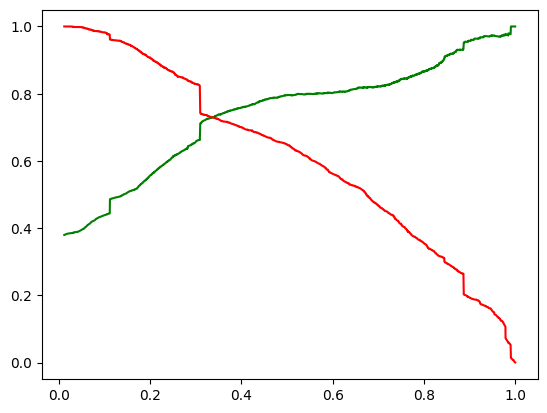

In [137]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [138]:
#scaling test set

num_cols=X_test.select_dtypes(include=['float64', 'int64']).columns

X_test[num_cols] = scaler.fit_transform(X_test[num_cols])

X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
3504,-0.293797,-0.058621,-0.108519,0.416452,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
4050,-0.293797,-1.150166,-0.888077,-1.263530,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
7201,3.403712,-0.422469,0.420993,-0.143542,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1196,-0.293797,0.305228,-0.110357,0.976446,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
8219,-0.293797,1.396773,-0.433947,-0.283540,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0


In [139]:
X_test = X_test[col]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,What is your current occupation_Businessman,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
3504,-0.293797,-0.108519,0,0,0,1,0,0,0,0,1,0
4050,-0.293797,-0.888077,1,0,0,0,1,0,0,0,1,0
7201,3.403712,0.420993,0,1,0,0,0,0,0,0,1,0
1196,-0.293797,-0.110357,0,0,0,1,0,0,0,0,1,0
8219,-0.293797,-0.433947,0,1,0,0,0,0,0,0,1,0


In [140]:
X_test_sm = sm.add_constant(X_test)

In [141]:
X_test_sm.shape

(2731, 13)

In [142]:
y_test_pred = res.predict(X_test_sm)   

In [143]:
y_test_pred[:10]

3504    0.305652
4050    0.885454
7201    0.148023
1196    0.305222
8219    0.203736
8747    0.110928
9048    0.317979
6524    0.223573
7693    0.052378
8187    0.885454
dtype: float64

In [144]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [145]:
# Let's see the head
y_pred_1.head()

,0
3504,0.305652
4050,0.885454
7201,0.148023
1196,0.305222
8219,0.203736


In [146]:
# Let's see the head
y_pred_1.head()

,0
3504,0.305652
4050,0.885454
7201,0.148023
1196,0.305222
8219,0.203736


In [147]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [148]:
# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index

In [149]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [150]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [151]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,3504,0.305652
1,1,4050,0.885454
2,0,7201,0.148023
3,0,1196,0.305222
4,1,8219,0.203736


In [152]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [153]:
y_pred_final.head()

,Converted,Prospect ID,Converted_prob
0,0,3504,0.305652
1,1,4050,0.885454
2,0,7201,0.148023
3,0,1196,0.305222
4,1,8219,0.203736


In [154]:
# Rearranging the columns
y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_prob']]
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

In [155]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score
0,3504,0,0.305652,31
1,4050,1,0.885454,89
2,7201,0,0.148023,15
3,1196,0,0.305222,31
4,8219,1,0.203736,20


In [156]:
y_pred_final['final_Predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.3 else 0)

In [157]:
# checking if 80% cases are correctly predicted based on the converted column.

# get the total of final predicted conversion or non conversion counts from the actual converted rates

checking_test_df = y_pred_final.loc[y_pred_final['Converted']==1,['Converted','final_Predicted']]
checking_test_df['final_Predicted'].value_counts()

1    865
0    177
Name: final_Predicted, dtype: int64

In [158]:
# check the precentage of final_predicted conversions on test data

865/float(865+177)

0.8301343570057581

In [159]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.7751739289637496

In [160]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion2

array([[1252,  437],
       [ 177,  865]])

In [161]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [162]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8301343570057581

In [163]:
# Let us calculate specificity
TN / float(TN+FP)

0.7412670219064535

The model was run on the test data and the following results were obtained:

Accuracy: 77.52%
Sensitivity: 83.01%
Specificity: 74.13%
These results are similar to the results obtained on the training data, which suggests that the model is performing well.

The important features that contribute to the probability of a lead being converted are:

Lead Origin: Lead Add Form

What is your current occupation: Working Professional

Total Time Spent on Website: 

These features can be used to target marketing campaigns more effectively. For example, if a company is trying to sell a product or service to working professionals, they may want to focus their marketing efforts on leads that have those characteristics.

Here are some additional insights that can be gained from this information:

The model is more likely to correctly predict that a lead will convert if the lead came from the Lead Add Form.

The model is more likely to correctly predict that a lead will convert if the lead is a working professional.

The model is more likely to correctly predict that a lead will convert if the lead spent a longer time on the website.

This information can be used to improve the conversion rate of a company's marketing campaigns.